## remove extraneous well portions from images 
pad to square or rectangle (by neighbouring pixels(?) or B/W) : diameter = length of square

or should it be cropped from inside the well? : diameter = diagonal of square

if the image is already a crop of the well, it should be left intact? 
(eg. C:\Users\DAR9KOR\Desktop\data\HEALTHCARE\Merck\New_Sample_Images_Resized\SuHV1_Plate 10 Labeled\SUHV1_G2_POS.TIF)

https://content.instructables.com/ORIG/FYS/C6X1/IKECQ3CY/FYSC6X1IKECQ3CY.py 

https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

https://stackoverflow.com/questions/21612258/filled-circle-detection-using-cv2-in-python

https://stackoverflow.com/questions/35519102/detect-circle-like-shapes-opencv 

https://stackoverflow.com/questions/15878325/what-are-the-possible-fast-ways-to-detect-circle-in-an-image

#### Hough circle parameter finding

https://stackoverflow.com/questions/26254287/houghcircles-circle-detection-using-opencv-and-python

https://stackoverflow.com/questions/38048265/houghcircles-cant-detect-circles-on-this-image/46500223#46500223

https://en.wikipedia.org/wiki/Circle_Hough_Transform   (theory)

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html  (median filter vs gaussian filter: gaussian filter blurs edges; median filter is good for salt-&-pepper noise)

https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm  (erosion, dilation)

http://homepages.inf.ed.ac.uk/rbf/HIPR2/open.htm

https://northstar-www.dartmouth.edu/doc/idl/html_6.2/Eroding_and_Dilating_Image_Objects.html

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html (simple vs adaptive thresholding)

HoughTransform based method worked (combination of blurring + threshold + erosion-dilation + Hough transform)

FindContours did not work

need to check on more images

#### filing an image

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

floodfill  # https://www.learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/
;  https://medium.com/@elvisdias/introduction-to-opencv-with-python-i-9fc72082f230 

inpaint  # https://docs.opencv.org/master/df/d3d/tutorial_py_inpainting.html


#### finding connected component
https://stackoverflow.com/questions/47520487/how-to-use-python-opencv-to-find-largest-connected-component-in-a-single-channel

https://stackoverflow.com/questions/46441893/connected-component-labeling-in-python/46442154

https://stackoverflow.com/questions/10196198/how-to-remove-convexity-defects-in-a-sudoku-square/10226971#10226971

https://stackoverflow.com/questions/51009126/opencv-how-to-correctly-apply-morphologyex-operation

####  closing + floodfill did not work   
Used open/ close operations to regularize he boundaries for hough circle detection.
Floodfill did not work, since there are still some breaks in the boundaries. 
Opening = erosion + dilation ;
Closing = dilation + erosion ;
Since the well boundary is black, it is breaking up when using the closing operation (adds white pixels);
need to use open operation instead


#### finding connected component did not work
connected component analysis works on the white pixels.
some images have dark stain, some are light.
so simply inverting the images to run connectedComponents will not work
As a result, it is finding only patchy components.


In [1]:
import os
import numpy as np
import argparse
#import imutils
#from imutils import perspective
#from imutils import contours
import cv2

In [ ]:
os.getcwd()
path='C:/Users/Desktop/data/DETECT_WELL/'

In [ ]:
# read & show the dimensions image

from IPython import display
display.display(display.Image('C:/Users/Desktop/data/New_Sample_Images_Resized/img.TIF'))

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
def showimage(img):
    plt.imshow(img) #(img,cmap='gray')
    plt.show()

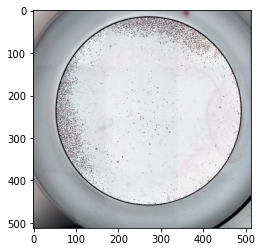

In [25]:
# load & see the image
path='C:/Users/Desktop/data/New_Sample_Images_Resized/'
image = cv2.imread(path+'img.TIF')
showimage(image)

In [26]:
# load the image, clone it for output, and then convert it to grayscale
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.5, 100)
#circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 260, param1=30, param2=65, minRadius=0, maxRadius=0)
#                                                     dp, minDist, param1, param2, minRadius, maxRadius

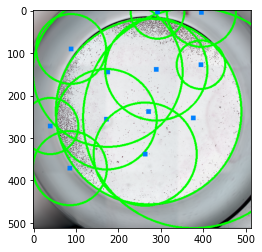

In [14]:
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

dp: This parameter is the inverse ratio of the accumulator resolution to the image resolution (see Yuen et al. for more details). Essentially, the larger the dp gets, the smaller the accumulator array gets.

minDist: Minimum distance between the center (x, y) coordinates of detected circles. If the minDist is too small, multiple circles in the same neighborhood as the original may be (falsely) detected. If the minDist is too large, then some circles may not be detected at all.

param1: Gradient value used to handle edge detection in the Yuen et al. method.

param2: Accumulator threshold value for the cv2.HOUGH_GRADIENT method. The smaller the threshold is, the more circles will be detected (including false circles). The larger the threshold is, the more circles will potentially be returned.

minRadius: Minimum size of the radius (in pixels).
maxRadius: Maximum size of the radius (in pixels).

#### modify the parameters for hough transform & retry

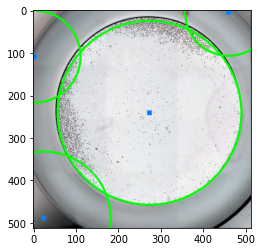

In [27]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, 300)#, param1=30, param2=65, minRadius=0, maxRadius=500)

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

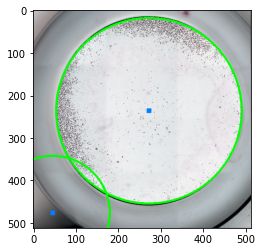

In [28]:
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the parameters for houghtransform & retry

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 3, 300)#, param1=30, param2=65, minRadius=0, maxRadius=500)

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

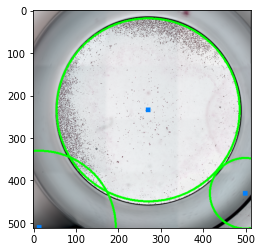

In [30]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the parameters for houghtransform & retry

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 4, 300)#, param1=30, param2=65, minRadius=0, maxRadius=500)

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

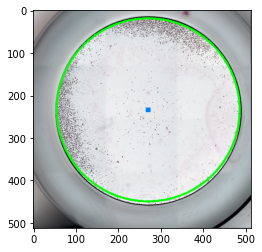

In [37]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the parameters for houghtransform & retry

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 4, 500)#, param1=30, param2=65, minRadius=0, maxRadius=500)

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

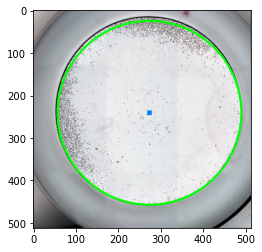

In [41]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the parameters for houghtransform & retry

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, 500)#, param1=30, param2=65, minRadius=0, maxRadius=500)

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

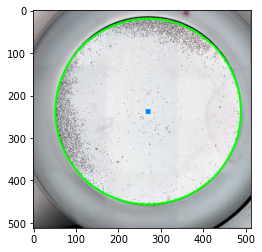

In [42]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the parameters for houghtransform & retry

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 300)#, param1=30, param2=65, minRadius=0, maxRadius=500)

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

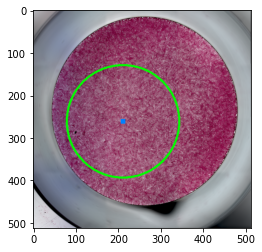

In [75]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the parameters for houghtransform & retry
#circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 4, 300)#, many circles
#circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, 300)#, 
#circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, 400)#, 1 small circle
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, 500)#, param1=30, param2=65, minRadius=0, maxRadius=500)


# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

#### apply blurring, erosion-dilation & then Hough transform

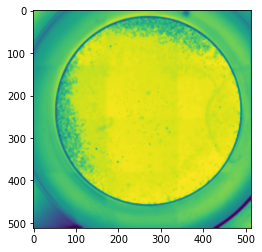

In [31]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
gray = cv2.medianBlur(gray,5)
    
showimage(gray)   

In [ ]:
'''
# Adaptive Guassian Threshold is to detect sharp edges in the Image. For more information Google it.
gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                             cv2.THRESH_BINARY,11,3.5)

#kernel = np.ones((2.6,2.7),np.uint8)
#gray = cv2.erode(gray,kernel,iterations = 1)
#gray = cv2.dilate(gray,kernel,iterations = 1)

showimage(gray)

# gives error
'''

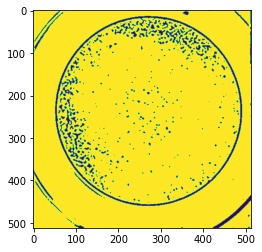

In [33]:
gray = cv2.erode(gray,None,iterations = 1)
gray = cv2.dilate(gray,None,iterations = 1)
showimage(gray)

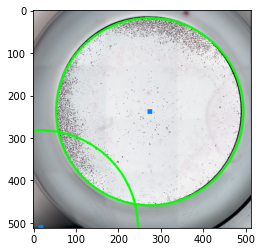

In [34]:
# hough transform

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 4, 300)#, param1=30, param2=65, minRadius=0, maxRadius=500)

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    showimage(output)

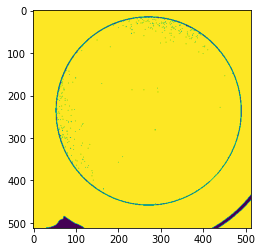

In [7]:
# try thresholding & find contours

image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

retval, thres_image = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
showimage(thres_image)

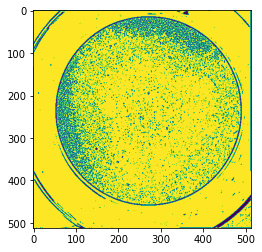

In [47]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thres = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                             cv2.THRESH_BINARY,11,3.5)

showimage(thres)

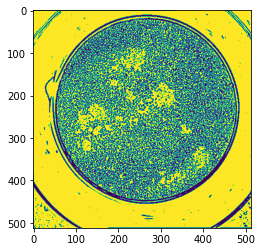

In [48]:
# effect of thresholding on image with negative stain

image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thres = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                             cv2.THRESH_BINARY,11,3.5)

showimage(thres)

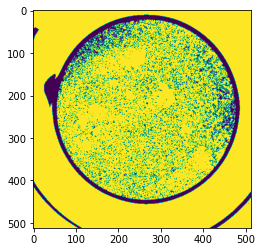

In [49]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

retval, thres_image = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
showimage(thres_image)

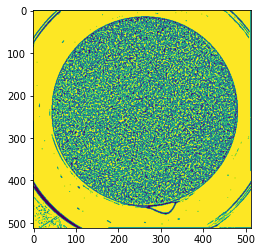

In [55]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thres = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                             cv2.THRESH_BINARY,11,3.5)
showimage(thres)

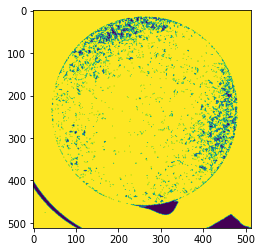

In [51]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

retval, thres_image = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
showimage(thres_image)

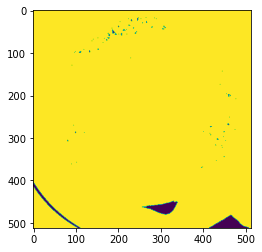

In [9]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

retval, thres_image = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
thres_image = cv2.dilate(thres_image, None, iterations=1)
showimage(thres_image)

In [10]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thres = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                             cv2.THRESH_BINARY,11,3.5)

contours, hierarchy = cv2.findContours(
    thres,
    cv2.RETR_LIST,
    cv2.CHAIN_APPROX_SIMPLE
)

In [64]:
contours

[array([[[ 50, 510]],
 
        [[ 51, 509]],
 
        [[ 52, 510]],
 
        [[ 51, 511]]], dtype=int32),
 array([[[ 35, 510]],
 
        [[ 36, 509]],
 
        [[ 37, 510]],
 
        [[ 36, 511]]], dtype=int32),
 array([[[ 22, 510]],
 
        [[ 23, 509]],
 
        [[ 24, 509]],
 
        [[ 25, 510]],
 
        [[ 24, 511]],
 
        [[ 23, 511]]], dtype=int32),
 array([[[  5, 509]],
 
        [[  6, 508]],
 
        [[  7, 508]],
 
        [[  8, 509]],
 
        [[  7, 510]],
 
        [[  6, 510]]], dtype=int32),
 array([[[451, 508]],
 
        [[452, 507]],
 
        [[453, 508]],
 
        [[452, 509]]], dtype=int32),
 array([[[ 52, 508]],
 
        [[ 53, 507]],
 
        [[ 54, 507]],
 
        [[ 55, 508]],
 
        [[ 54, 509]],
 
        [[ 53, 509]]], dtype=int32),
 array([[[ 15, 507]],
 
        [[ 16, 508]],
 
        [[ 16, 510]],
 
        [[ 15, 511]],
 
        [[ 13, 511]],
 
        [[ 12, 510]]], dtype=int32),
 array([[[ 69, 507]],
 
        [[ 70, 506]],

In [65]:
hierarchy

array([[[   1,   -1,   -1,   -1],
        [   2,    0,   -1,   -1],
        [   3,    1,   -1,   -1],
        ...,
        [3661, 3659,   -1,   -1],
        [3662, 3660,   -1,   -1],
        [  -1, 3661,   -1,   -1]]], dtype=int32)

In [66]:
contours, hierarchy = cv2.findContours(
    thres,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)
contours

[array([[[431, 506]],
 
        [[430, 507]],
 
        [[429, 507]],
 
        [[427, 509]],
 
        [[426, 509]],
 
        [[425, 510]],
 
        [[424, 510]],
 
        [[423, 511]],
 
        [[428, 511]],
 
        [[428, 510]],
 
        [[429, 509]],
 
        [[429, 508]]], dtype=int32),
 array([[[434, 504]],
 
        [[433, 505]]], dtype=int32),
 array([[[486, 462]],
 
        [[486, 463]],
 
        [[487, 462]]], dtype=int32),
 array([[[489, 459]],
 
        [[490, 459]]], dtype=int32),
 array([[[498, 450]],
 
        [[497, 451]],
 
        [[498, 451]]], dtype=int32),
 array([[[504, 444]],
 
        [[504, 445]],
 
        [[505, 444]]], dtype=int32),
 array([[[511, 441]],
 
        [[509, 443]],
 
        [[509, 444]],
 
        [[503, 450]],
 
        [[503, 451]],
 
        [[497, 457]],
 
        [[497, 458]],
 
        [[496, 459]],
 
        [[495, 459]],
 
        [[495, 460]],
 
        [[484, 471]],
 
        [[483, 471]],
 
        [[473, 481]],
 
        [[

In [67]:
centers = []
radii = []
for contour in contours:
    area = cv2.contourArea(contour)

    # there is one contour that contains all others, filter it out
    #if area > 500:
    #    continue

    br = cv2.boundingRect(contour)
    radii.append(br[2])

    m = cv2.moments(contour)
    center = (int(m['m10'] / m['m00']), int(m['m01'] / m['m00']))
    centers.append(center)

print("There are {} circles".format(len(centers)))

radius = int(np.average(radii)) + 5

for center in centers:
    cv2.circle(output, center, 3, (255, 0, 0), -1)
    cv2.circle(output, center, radius, (0, 255, 0), 1)

showimage(output)

ZeroDivisionError: float division by zero

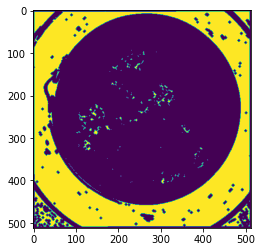

In [11]:
thres = cv2.drawContours(thres, contours, -1, (0,255,0), 3)
showimage(thres)

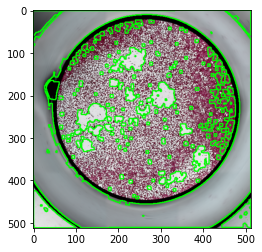

In [45]:
image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
gray = cv2.medianBlur(gray,7)

# threshold
gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    
# erosion-dilation
gray = cv2.erode(gray,None,iterations = 3)
gray = cv2.dilate(gray,None,iterations = 3)

contours, hierarchy = cv2.findContours(
    gray,
    cv2.RETR_LIST,
    cv2.CHAIN_APPROX_SIMPLE
)

f = cv2.drawContours(output, contours, -1, (0,255,0), 2)
showimage(f)

In [46]:
import pandas as pd

image = cv2.imread(path+'img.TIF')
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
gray = cv2.medianBlur(gray,7)

# threshold
gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    
# erosion-dilation
gray = cv2.erode(gray,None,iterations = 3)
gray = cv2.dilate(gray,None,iterations = 3)

contours, hierarchy = cv2.findContours(
    gray,
    cv2.RETR_LIST,
    cv2.CHAIN_APPROX_SIMPLE
)
#f = cv2.drawContours(output, contours, -1, (0,255,0), 2)

cir = []
for cnt in contours:
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(radius)
    cir.append([radius, int(x), int(y)])
    #f = cv2.circle(output,center,radius,(0,255,0),2)
    #showimage(f)

cir = pd.DataFrame(cir, columns=['radius','x','y'])
cir = cir.sort_values(by='radius', ascending=False).reset_index()
cir

index  radius    x    y
0      183     326  277  229
1      177     232  253  228
2        7      65   50  467
3      143      50  220  119
4        5      47  477  477
..     ...     ...  ...  ...
180    103       1  457  188
181    154       1  418   52
182    153       1  419   53
183    130       1  209  121
184    167       1  481   29

[185 rows x 4 columns]

In [38]:
cir.loc[0,'radius']

326

In [50]:
for i in range(0,2):
    x = cir.loc[i,'x']
    y = cir.loc[i,'y']
    center = (cir.loc[i,'x'],cir.loc[i,'y'])
    radius = cir.loc[i,'radius']
    cv2.circle(output, center, radius, (0, 255, 0), 2)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

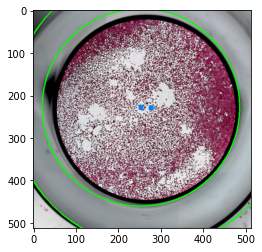

In [51]:
showimage(output)

# hough transform alone

In [68]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)

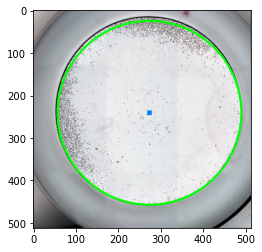

In [69]:
Hough_transform(path,'img1.TIF')

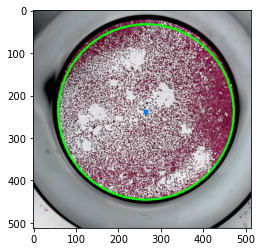

In [70]:
Hough_transform(path,'img2.TIF')

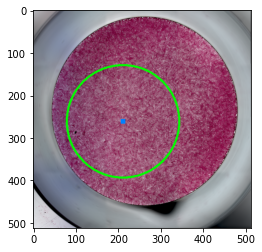

In [71]:
Hough_transform(path,'img3.TIF')

# apply blurring, & then Hough transform

In [76]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
    gray = cv2.medianBlur(gray,5)
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)

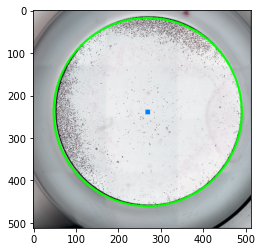

In [77]:
Hough_transform(path,'img1.TIF')

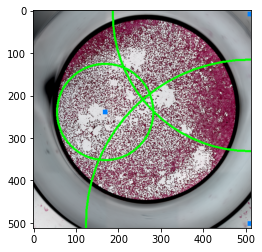

In [78]:
Hough_transform(path,'img2.TIF')

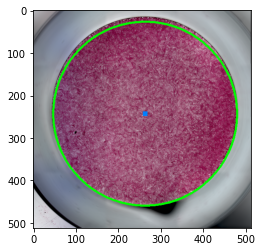

In [79]:
Hough_transform(path,'img3.TIF')

### change the amount of blurring

In [84]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    #gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
    gray = cv2.medianBlur(gray,5) # ksize: aperture linear size; it must be odd and greater than 1
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)

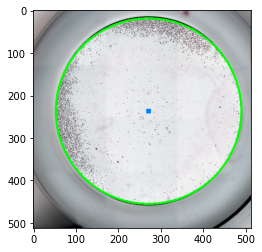

In [85]:
Hough_transform(path,'img1.TIF')

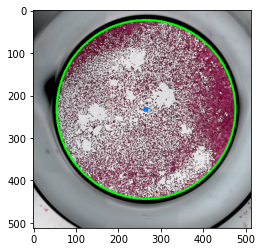

In [86]:
Hough_transform(path,'img2.TIF')

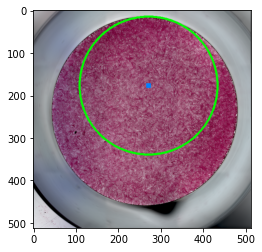

In [87]:
Hough_transform(path,'img3.TIF')

In [88]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    #gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
    gray = cv2.medianBlur(gray,7)
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)

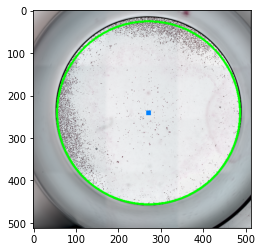

In [89]:
Hough_transform(path,'img1.TIF')

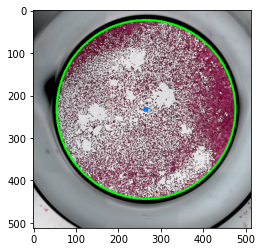

In [90]:
Hough_transform(path,'img2.TIF')

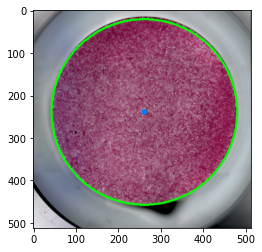

In [91]:
Hough_transform(path,'img3.TIF')

In [92]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    #gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
    gray = cv2.medianBlur(gray,9)
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)

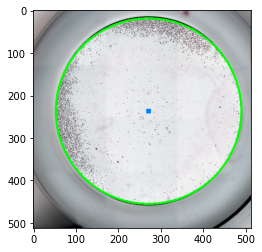

In [93]:
Hough_transform(path,'img1.TIF')

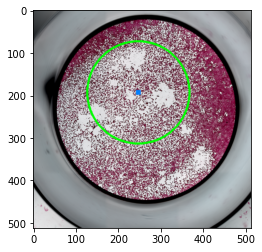

In [94]:
Hough_transform(path,'img2.TIF')

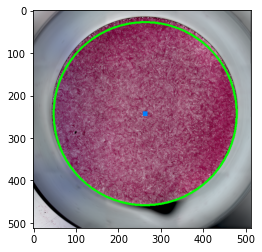

In [95]:
Hough_transform(path,'img3.TIF')

In [96]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    #gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
    gray = cv2.medianBlur(gray,7)
    gray = cv2.GaussianBlur(gray,(3,3),0)
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)

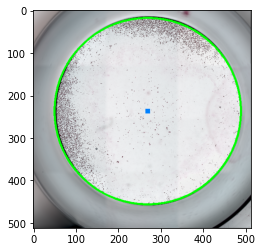

In [97]:
Hough_transform(path,'img1.TIF')

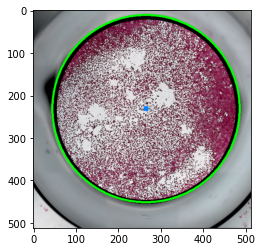

In [98]:
Hough_transform(path,'img2.TIF')

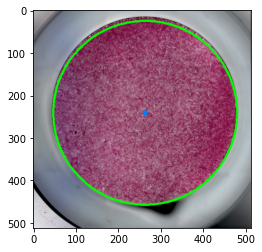

In [99]:
Hough_transform(path,'img3.TIF')

# apply blurring, erosion-dilation & then Hough transform

In [80]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
    gray = cv2.medianBlur(gray,5)
    
    # erosion-dilation
    gray = cv2.erode(gray,None,iterations = 1)
    gray = cv2.dilate(gray,None,iterations = 1)
    
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)


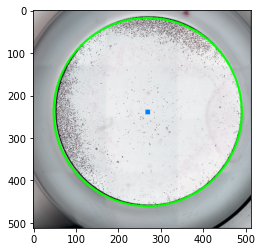

In [81]:
Hough_transform(path,'img1.TIF')

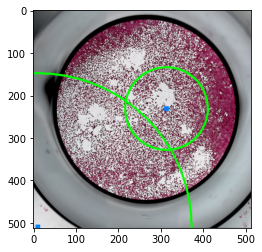

In [82]:
Hough_transform(path,'img1.TIF')

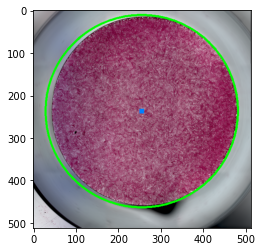

In [83]:
Hough_transform(path,'img1.TIF')

In [112]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    # gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
    gray = cv2.medianBlur(gray,7)
    gray = cv2.GaussianBlur(gray,(3,3),0)
    
    # erosion-dilation
    gray = cv2.erode(gray,None,iterations = 3)
    gray = cv2.dilate(gray,None,iterations = 3)
    
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)


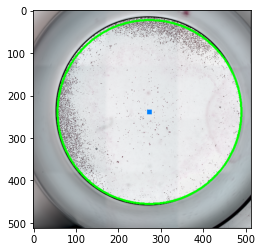

In [113]:
Hough_transform(path,'img1.TIF')

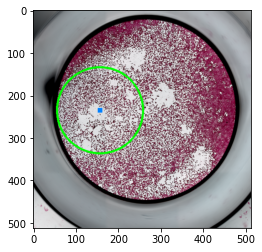

In [114]:
Hough_transform(path,'img2.TIF')

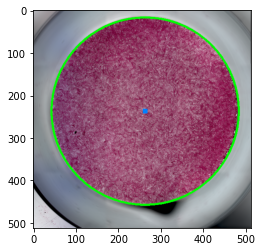

In [115]:
Hough_transform(path,'img3.TIF')

# apply blurring, threshold, erosion-dilation & then Hough transform

In [116]:
def Hough_transform(path,filename):
    image = cv2.imread(path+filename)  
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    # gray = cv2.GaussianBlur(gray,(5,5),0); # the tuple is the gaussian Kernel : controls the amount of blurring
    gray = cv2.medianBlur(gray,7)
    gray = cv2.GaussianBlur(gray,(3,3),0)
    
    # threshold
    gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    
    # erosion-dilation
    gray = cv2.erode(gray,None,iterations = 1)
    gray = cv2.dilate(gray,None,iterations = 1)
    
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        showimage(output)


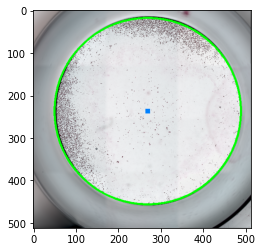

In [117]:
Hough_transform(path,'img1.TIF')

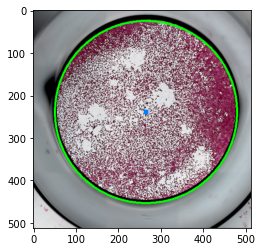

In [118]:
Hough_transform(path,'img2.TIF')

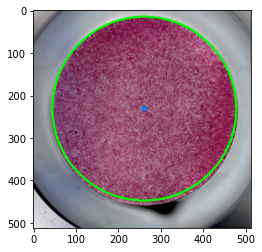

In [119]:
Hough_transform(path,'img3.TIF')

# #### final code, for testing ####

In [ ]:
import os
import numpy as np
import argparse
#import imutils
#from imutils import perspective
#from imutils import contours
import cv2

#os.getcwd()

In [6]:
# saving final image

def Hough_transform(filename,outfile):
    start_time=time.time()
    image = cv2.imread(filename)  
    print(" read time: %s seconds " % (time.time() - start_time)) 
    
    h, w, c = image.shape
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray = cv2.medianBlur(gray,9)
    #gray = cv2.medianBlur(gray,7)
    #gray = cv2.GaussianBlur(gray,(3,3),0)  # the tuple is the gaussian Kernel : controls the amount of blurring
    
    # threshold
    gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    
    # erosion-dilation
    gray = cv2.erode(gray,None,iterations = 3)
    gray = cv2.dilate(gray,None,iterations = 3)
    
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        #showimage(output)
        cv2.imwrite(outfile, output)
    else:
        cv2.imwrite(outfile, output)
    print(" Inference time: %s seconds " % (time.time() - start_time)) 


In [ ]:
image_List=[]
with open(("filelist.txt"),'r') as fobj:
    for line in fobj:
        #print(line)
        image_List.append(line.rstrip("\n"))
fobj.close()

In [ ]:
# with medianblur=9
d = 0
output_path = "C:/Users/Desktop/data/OUTPUT_mblur9/"
for image in image_List:
    print(image)
    outfile = output_path + "out_image_" + str(d) + ".jpg"
    Hough_transform(image,outfile)
    d = d+1

In [7]:
import time

In [ ]:
# with medianblur=7 , gaussianblur=3,3
d = 0
output_path = "C:/Users/Desktop/data/OUTPUT/"
for image in image_List:
    print(d,image)
    outfile = output_path + "out_image_" + str(d) + ".jpg"
    Hough_transform(image,outfile)
    d = d+1

#### save intermediate images 

In [1]:
import os
import numpy as np
import argparse
#import imutils
#from imutils import perspective
#from imutils import contours
import cv2
import time

In [71]:
# saving intermediate images
# https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
# https://answers.opencv.org/question/175912/how-to-display-multiple-images-in-one-window/
# https://stackoverflow.com/questions/51892431/how-to-write-multiple-images-subplots-into-one-image/51892858


def Hough_transform(filename,outfile):
    start_time=time.time()
    image = cv2.imread(filename)  
    print(" read time: %s seconds " % (time.time() - start_time)) 
    
    h, w, c = image.shape
    
    # resize large images
    if h>512:
        scale_percent = 30 # percent of original size
        w = int(image.shape[1] * scale_percent / 100)
        h = int(image.shape[0] * scale_percent / 100)
        dim = (w, h)
        # resize image
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray_blur = cv2.medianBlur(gray,9)
    #gray = cv2.medianBlur(gray,7)
    #gray = cv2.GaussianBlur(gray,(3,3),0)  # the tuple is the gaussian Kernel : controls the amount of blurring
    
    # threshold
    gray_thres = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    
    # erosion-dilation
    gray_e = cv2.erode(gray_thres,None,iterations = 3)
    gray_d = cv2.dilate(gray_e,None,iterations = 3)
    # dilation-erosion
    #gray_d = cv2.dilate(gray_thres,None,iterations = 1)
    #gray_e = cv2.erode(gray_d,None,iterations = 1)
    
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray_d, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        #showimage(output)
        #cv2.imwrite(outfile, output)   
        
    #else:
    #    cv2.imwrite(outfile, output)
    
    
        
    # Make the grey scale image have three channels
    #gray3 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    gray_blur3 = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2BGR)
    gray_thres3 = cv2.cvtColor(gray_thres, cv2.COLOR_GRAY2BGR)
    gray_e3 = cv2.cvtColor(gray_e, cv2.COLOR_GRAY2BGR)
    gray_d3 = cv2.cvtColor(gray_d, cv2.COLOR_GRAY2BGR)
    #output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)      
    
    
    # concatenate the images
    numpy_horizontal_concat = np.concatenate((gray_thres3, gray_e3, gray_d3, output), axis=1)
    cv2.imwrite(outfile, numpy_horizontal_concat)
    
    print(" Inference time: %s seconds " % (time.time() - start_time)) 


In [2]:
image_List=[]
with open(("filelist.txt"),'r') as fobj:
    for line in fobj:
        #print(line)
        image_List.append(line.rstrip("\n"))
fobj.close()

In [ ]:
d = 0
output_path = "C:/Users/DAR9KOR/Desktop/data/DETECT_WELL/OUTPUT_hough_inter/"
for image in image_List:
    print(d,image)
    outfile = output_path + "out_image_" + str(d) + ".jpg"
    Hough_transform(image,outfile)
    d = d+1

#### dilate-erode instead of erode-dilate

In [ ]:
# saving intermediate images
# https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
# https://answers.opencv.org/question/175912/how-to-display-multiple-images-in-one-window/
# https://stackoverflow.com/questions/51892431/how-to-write-multiple-images-subplots-into-one-image/51892858


def Hough_transform(filename,outfile):
    start_time=time.time()
    image = cv2.imread(filename)  
    print(" read time: %s seconds " % (time.time() - start_time)) 
    
    h, w, c = image.shape
    
    # resize large images
    if h>512:
        scale_percent = 30 # percent of original size
        w = int(image.shape[1] * scale_percent / 100)
        h = int(image.shape[0] * scale_percent / 100)
        dim = (w, h)
        # resize image
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray_blur = cv2.medianBlur(gray,9)
    #gray = cv2.medianBlur(gray,7)
    #gray = cv2.GaussianBlur(gray,(3,3),0)  # the tuple is the gaussian Kernel : controls the amount of blurring
    
    # threshold
    gray_thres = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    
    # erosion-dilation
    #gray_e = cv2.erode(gray_thres,None,iterations = 3)
    #gray_d = cv2.dilate(gray_e,None,iterations = 3)
    # dilation-erosion
    gray_d = cv2.dilate(gray_thres,None,iterations = 1)
    gray_e = cv2.erode(gray_d,None,iterations = 1)
    
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray_e, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        #showimage(output)
        #cv2.imwrite(outfile, output)   
        
    #else:
    #    cv2.imwrite(outfile, output)
    
    
        
    # Make the grey scale image have three channels
    #gray3 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    gray_blur3 = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2BGR)
    gray_thres3 = cv2.cvtColor(gray_thres, cv2.COLOR_GRAY2BGR)
    gray_e3 = cv2.cvtColor(gray_e, cv2.COLOR_GRAY2BGR)
    gray_d3 = cv2.cvtColor(gray_d, cv2.COLOR_GRAY2BGR)
    #output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)      
    
    
    # concatenate the images
    numpy_horizontal_concat = np.concatenate((gray_thres3, gray_d3, gray_e3, output), axis=1)
    cv2.imwrite(outfile, numpy_horizontal_concat)
    
    print(" Inference time: %s seconds " % (time.time() - start_time)) 


In [ ]:
# dilate-erode instead of erode-dilate

d = 0
output_path = "./DETECT_WELL/OUTPUT_hough_dil_er/"
for image in image_List:
    print(d,image)
    outfile = output_path + "out_image_" + str(d) + ".jpg"
    Hough_transform(image,outfile)
    d = d+1

#####  use Otsu's threshold

In [75]:
# saving intermediate images
# https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
# https://answers.opencv.org/question/175912/how-to-display-multiple-images-in-one-window/
# https://stackoverflow.com/questions/51892431/how-to-write-multiple-images-subplots-into-one-image/51892858


def Hough_transform(filename,outfile):
    start_time=time.time()
    image = cv2.imread(filename)  
    print(" read time: %s seconds " % (time.time() - start_time)) 
    
    h, w, c = image.shape
    
    # resize large images
    if h>512:
        scale_percent = 30 # percent of original size
        w = int(image.shape[1] * scale_percent / 100)
        h = int(image.shape[0] * scale_percent / 100)
        dim = (w, h)
        # resize image
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray_blur = cv2.medianBlur(gray,9)
    #gray = cv2.medianBlur(gray,7)
    #gray = cv2.GaussianBlur(gray,(3,3),0)  # the tuple is the gaussian Kernel : controls the amount of blurring
    
    # threshold
    #gray_thres = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    ret3,gray_thres = cv2.threshold(gray_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Otsu
    
    # erosion-dilation
    #gray_e = cv2.erode(gray_thres,None,iterations = 3)
    #gray_d = cv2.dilate(gray_e,None,iterations = 3)
    # dilation-erosion
    gray_d = cv2.dilate(gray_thres,None,iterations = 1)
    gray_e = cv2.erode(gray_d,None,iterations = 1)
    
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray_e, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        #showimage(output)
        #cv2.imwrite(outfile, output)   
        
    #else:
    #    cv2.imwrite(outfile, output)
    
    
        
    # Make the grey scale image have three channels
    #gray3 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    gray_blur3 = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2BGR)
    gray_thres3 = cv2.cvtColor(gray_thres, cv2.COLOR_GRAY2BGR)
    gray_e3 = cv2.cvtColor(gray_e, cv2.COLOR_GRAY2BGR)
    gray_d3 = cv2.cvtColor(gray_d, cv2.COLOR_GRAY2BGR)
    #output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)      
    
    
    # concatenate the images
    numpy_horizontal_concat = np.concatenate((gray_thres3, gray_d3, gray_e3, output), axis=1)
    cv2.imwrite(outfile, numpy_horizontal_concat)
    
    print(" Inference time: %s seconds " % (time.time() - start_time)) 


In [ ]:
# dilate-erode instead of erode-dilate

d = 0

output_path = "./DETECT_WELL/OUTPUT_hough_otsu_dil_er/"
#os.mkdir(output_path)

for image in image_List:
    print(d,image)
    outfile = output_path + "out_image_" + str(d) + ".jpg"
    Hough_transform(image,outfile)
    d = d+1

In [81]:
# OTSU + erode-dilate

def Hough_transform(filename,outfile):
    start_time=time.time()
    image = cv2.imread(filename)  
    print(" read time: %s seconds " % (time.time() - start_time)) 
    
    h, w, c = image.shape
    
    # resize large images
    if h>512:
        scale_percent = 30 # percent of original size
        w = int(image.shape[1] * scale_percent / 100)
        h = int(image.shape[0] * scale_percent / 100)
        dim = (w, h)
        # resize image
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray_blur = cv2.medianBlur(gray,9)
    #gray = cv2.medianBlur(gray,7)
    #gray = cv2.GaussianBlur(gray,(3,3),0)  # the tuple is the gaussian Kernel : controls the amount of blurring
    
    # threshold
    #gray_thres = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    ret3,gray_thres = cv2.threshold(gray_blur,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Otsu
    
    
    # erosion-dilation
    gray_e = cv2.erode(gray_thres,None,iterations = 3)
    gray_d = cv2.dilate(gray_e,None,iterations = 3)
    # dilation-erosion
    #gray_d = cv2.dilate(gray_thres,None,iterations = 1)
    #gray_e = cv2.erode(gray_d,None,iterations = 1)
    
    
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray_d, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        #showimage(output)
        #cv2.imwrite(outfile, output)   
        
    #else:
    #    cv2.imwrite(outfile, output)
    
    
        
    # Make the grey scale image have three channels
    #gray3 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    gray_blur3 = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2BGR)
    gray_thres3 = cv2.cvtColor(gray_thres, cv2.COLOR_GRAY2BGR)
    gray_e3 = cv2.cvtColor(gray_e, cv2.COLOR_GRAY2BGR)
    gray_d3 = cv2.cvtColor(gray_d, cv2.COLOR_GRAY2BGR)
    #output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)      
    
    
    # concatenate the images
    numpy_horizontal_concat = np.concatenate((gray_thres3, gray_e3, gray_d3, output), axis=1)
    cv2.imwrite(outfile, numpy_horizontal_concat)
    
    print(" Inference time: %s seconds " % (time.time() - start_time)) 


In [ ]:
#  erode-dilate

d = 0

output_path = "./DETECT_WELL/OUTPUT_hough_otsu_er_dil-r2/"
os.mkdir(output_path)

for image in image_List:
    print(d,image)
    outfile = output_path + "out_image_" + str(d) + ".jpg"
    Hough_transform(image,outfile)
    d = d+1

thresholding + erosion-dilation + hole-filling

In [50]:
# OTSU / adaptive thres + erode-dilate

def Hough_transform(filename,outfile):
    start_time=time.time()
    image = cv2.imread(filename)  
    print(" read time: %s seconds " % (time.time() - start_time)) 
    
    h, w, c = image.shape
    '''
    # resize large images
    if h>512:
        scale_percent = 30 # percent of original size
        w = int(image.shape[1] * scale_percent / 100)
        h = int(image.shape[0] * scale_percent / 100)
        dim = (w, h)
        # resize image
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    '''
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray_blur = cv2.medianBlur(gray,9)
    #gray = cv2.medianBlur(gray,7)
    #gray = cv2.GaussianBlur(gray,(3,3),0)  # the tuple is the gaussian Kernel : controls the amount of blurring
    
    # threshold
    gray_thres = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    #ret3,gray_thres = cv2.threshold(gray_blur,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Otsu
    
    
    # erosion-dilation
    #gray_e = cv2.erode(gray_thres,None,iterations = 3)
    #gray_d = cv2.dilate(gray_e,None,iterations = 3)
    # dilation-erosion
    gray_d = cv2.dilate(gray_thres,None,iterations = 1)
    gray_e = cv2.erode(gray_d,None,iterations = 1)
    #kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    #gray_d = cv2.dilate(gray_thres,kernel1,iterations = 1)
    #gray_e = cv2.erode(gray_d,kernel1,iterations = 1)
    
    # hole filling
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)) #(11,11)  (15,15)
    #close = cv2.morphologyEx(gray_e,cv2.MORPH_CLOSE,kernel1)
    # the closing operation adds white pixels; since the well boundary is black, it is breaking up,
    # need to use open operation instead
    close = cv2.morphologyEx(gray_e,cv2.MORPH_OPEN,kernel1)
    #close = cv2.morphologyEx(gray_thres,cv2.MORPH_OPEN,kernel1)
    
    
    # flood-fill
    #mask = np.zeros((h+2, w+2), np.uint8)
    #im_floodfill = close.copy()
    #cv2.floodFill(im_floodfill, mask, (0,0), 255);
    #im_floodfill_inv = cv2.bitwise_not(im_floodfill)
                                       
    
    # modify the parameters for houghtransform & retry    
    #circles = cv2.HoughCircles(gray_e, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    circles = cv2.HoughCircles(close, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    #circles = cv2.HoughCircles(im_floodfill_inv, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)

    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        #showimage(output)
        #cv2.imwrite(outfile, output)   
        
    #else:
    #    cv2.imwrite(outfile, output)
    
    
        
    # Make the grey scale image have three channels
    #gray3 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    gray_blur3 = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2BGR)
    gray_thres3 = cv2.cvtColor(gray_thres, cv2.COLOR_GRAY2BGR)
    gray_e3 = cv2.cvtColor(gray_e, cv2.COLOR_GRAY2BGR)
    gray_d3 = cv2.cvtColor(gray_d, cv2.COLOR_GRAY2BGR)
    close3 = cv2.cvtColor(close, cv2.COLOR_GRAY2BGR)
    #im_floodfill3 = cv2.cvtColor(im_floodfill, cv2.COLOR_GRAY2BGR)
    #im_floodfill_inv3 = cv2.cvtColor(im_floodfill_inv, cv2.COLOR_GRAY2BGR)
    #output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)      
    
    
    # concatenate the images
    #numpy_horizontal_concat = np.concatenate((gray_thres3, gray_d3, gray_e3, output), axis=1)
    numpy_horizontal_concat = np.concatenate((gray_thres3, close3, output), axis=1)
    cv2.imwrite(outfile, numpy_horizontal_concat)
    
    print(" Inference time: %s seconds " % (time.time() - start_time)) 


In [51]:
image_List=[]
with open(("filelist2.txt"),'r') as fobj:
    for line in fobj:
        #print(line)
        image_List.append(line.rstrip("\n"))
fobj.close()

In [ ]:
#  erode-dilate

d = 0

#output_path = "./DETECT_WELL/OUTPUT_hough_otsu_er_dil_close/"
#output_path = "./DETECT_WELL/OUTPUT_hough_otsu_dil_er_close/"
#output_path = "./DETECT_WELL/OUTPUT_hough_otsu_dil_er_open/"
#output_path = "./DETECT_WELL/OUTPUT_hough_adapt_dil_er_open/"
#output_path = "./DETECT_WELL/OUTPUT_hough_adapt_er_dil_open/"
#output_path = "./DETECT_WELL/OUTPUT_hough_adapt_open_bigkernel/"
#output_path = "./DETECT_WELL/OUTPUT_hough_otsu_open/"
#output_path = "./DETECT_WELL/OUTPUT_hough_adapt_open_floodfill_bigkernel/"
#output_path = "./DETECT_WELL/OUTPUT_hough_adapt_open_smallkernel/"
#output_path = "./DETECT_WELL/OUTPUT_hough_adapt_dil_er_kernel/"

output_path = "./DETECT_WELL/OUTPUT_fullsize_hough_adapt_dil_er_open/"

#os.mkdir(output_path)


for image in image_List:
    print(d,image)
    outfile = output_path + "out_image_" + str(d) + ".jpg"
    Hough_transform(image,outfile)
    d = d+1


# using connected component

In [37]:
# OTSU / adaptive thres + erode-dilate

def Hough_transform(filename): #,outfile):
    start_time=time.time()
    image = cv2.imread(filename)  
    print(" read time: %s seconds " % (time.time() - start_time)) 
    
    h, w, c = image.shape
    
    # resize large images
    if h>512:
        scale_percent = 30 # percent of original size
        w = int(image.shape[1] * scale_percent / 100)
        h = int(image.shape[0] * scale_percent / 100)
        dim = (w, h)
        # resize image
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    mindist = int(min(h,w) * 0.8)
    
    # keep copy of input image for final view
    output = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray_blur = cv2.medianBlur(gray,9)
    #gray = cv2.medianBlur(gray,7)
    #gray = cv2.GaussianBlur(gray,(3,3),0)  # the tuple is the gaussian Kernel : controls the amount of blurring
    
    # threshold
    gray_thres = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
    #ret3,gray_thres = cv2.threshold(gray_blur,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Otsu
    
    
    # erosion-dilation
    #gray_e = cv2.erode(gray_thres,None,iterations = 3)
    #gray_d = cv2.dilate(gray_e,None,iterations = 3)
    # dilation-erosion
    #kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    #gray_d = cv2.dilate(gray_thres,None,iterations = 1)
    #gray_e = cv2.erode(gray_d,None,iterations = 1)
    
    
    # hole filling
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)) #(11,11)  (15,15)
    #close = cv2.morphologyEx(gray_e,cv2.MORPH_CLOSE,kernel1)
    # the closing operation adds white pixels; since the well boundary is black, it is breaking up,
    # need to use open operation instead
    #close = cv2.morphologyEx(gray_d,cv2.MORPH_OPEN,kernel1)
    close = cv2.morphologyEx(gray_thres,cv2.MORPH_OPEN,kernel1)
    
    
    # flood-fill
    #mask = np.zeros((h+2, w+2), np.uint8)
    #im_floodfill = close.copy()
    #cv2.floodFill(im_floodfill, mask, (0,0), 255);
    #im_floodfill_inv = cv2.bitwise_not(im_floodfill)
                                       
    '''
    # modify the parameters for houghtransform & retry    
    circles = cv2.HoughCircles(gray_e, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    #circles = cv2.HoughCircles(close, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)
    #circles = cv2.HoughCircles(im_floodfill_inv, cv2.HOUGH_GRADIENT, 2, mindist)#, param1=30, param2=65, minRadius=0, maxRadius=500)

    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
        # show the output image
        #cv2.imshow("output", np.hstack([image, output]))
        #cv2.waitKey(0)
        #showimage(output)
        #cv2.imwrite(outfile, output)   
        
    #else:
    #    cv2.imwrite(outfile, output)
    '''
    
    # get connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(close, 8)#[1:3]
    print(stats)
    imshow_components(labels)
    
    '''    
    # Make the grey scale image have three channels
    #gray3 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    gray_blur3 = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2BGR)
    gray_thres3 = cv2.cvtColor(gray_thres, cv2.COLOR_GRAY2BGR)
    gray_e3 = cv2.cvtColor(gray_e, cv2.COLOR_GRAY2BGR)
    gray_d3 = cv2.cvtColor(gray_d, cv2.COLOR_GRAY2BGR)
    #close3 = cv2.cvtColor(close, cv2.COLOR_GRAY2BGR)
    #im_floodfill3 = cv2.cvtColor(im_floodfill, cv2.COLOR_GRAY2BGR)
    #im_floodfill_inv3 = cv2.cvtColor(im_floodfill_inv, cv2.COLOR_GRAY2BGR)
    #output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)      
    
    
    # concatenate the images
    numpy_horizontal_concat = np.concatenate((gray_thres3, gray_d3, gray_e3, output), axis=1)
    #numpy_horizontal_concat = np.concatenate((gray_thres3, close3, output), axis=1)
    cv2.imwrite(outfile, numpy_horizontal_concat)
    
    print(" Inference time: %s seconds " % (time.time() - start_time)) 
    '''


In [38]:
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2.imshow('labeled.png', labeled_img)
    cv2.waitKey()

Hough_transform(image_List[0])

 read time: 0.0144195556640625 seconds 
[[     0      0    512    512  89542]
 [     0      0    512    512 104372]
 [   230     20     44     15    451]
 [   277     20     13     13    122]
 [   214     25     13     11    101]
 [   195     30     15     11    118]
 [   247     32      9      9     57]
 [   223     35     14     22    199]
 [   265     36     13     11    112]
 [   277     38     30     21    362]
 [   203     41     19     32    344]
 [   308     42     11     17    148]
 [   237     46     23     20    299]
 [   192     48     10      9     66]
 [   295     53     11     13    100]
 [   343     52     14     12    123]
 [   177     56     13     12    110]
 [   145     58     24     27    309]
 [   169     61     42     31    558]
 [   263     61     12     10     95]
 [   323     61      9      9     57]
 [   365     60     14     12    124]
 [   211     64     37     19    449]
 [   306     66     11      9     73]
 [   283     69     25     22    272]
 [   345  

## contour based method

In [52]:
import os
import time
import numpy as np
import pandas as pd
import argparse
#import imutils
#from imutils import perspective
#from imutils import contours
import cv2

In [61]:
def get_Contour(image,contourfile):
    start_time=time.time()
    image = cv2.imread(image)
    
    # keep copy of input image for final view
    output = image.copy()
    output2 = image.copy()
    
    # convert image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
    gray = cv2.medianBlur(gray,7)
    
    # threshold
    gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3.5)
        
    # erosion-dilation
    gray = cv2.erode(gray,None,iterations = 3)
    gray = cv2.dilate(gray,None,iterations = 3)
    
    # find contours
    contours, hierarchy = cv2.findContours(
        gray,
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE
    )
    cv2.drawContours(output2, contours, -1, (0,255,0), 2)
    cv2.imwrite(contourfile,output2)
    return contours,start_time,output
   
def draw_circle(image,outfile,contourfile):
    contours,start_time,output = get_Contour(image,contourfile)
    # fit circles to the contours
    # https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
    cir = []
    for cnt in contours:
        (x,y),radius = cv2.minEnclosingCircle(cnt)
        center = (int(x),int(y))
        radius = int(radius)
        cir.append([radius, int(x), int(y)])
        #f = cv2.circle(output,center,radius,(0,255,0),2)
        #showimage(f)
    
    cir = pd.DataFrame(cir, columns=['radius','x','y'])
    cir = cir.sort_values(by='radius', ascending=False).reset_index()
    
    for i in range(0,2):
        x = cir.loc[i,'x']
        y = cir.loc[i,'y']
        center = (cir.loc[i,'x'],cir.loc[i,'y'])
        radius = cir.loc[i,'radius']
        cv2.circle(output, center, radius, (0, 255, 0), 2)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
    cv2.imwrite(outfile, output)
    print(" Inference time: %s seconds " % (time.time() - start_time))

In [57]:
image_List=[]
with open(("filelist.txt"),'r') as fobj:
    for line in fobj:
        #print(line)
        image_List.append(line.rstrip("\n"))
fobj.close()

In [ ]:
d = 0
output_path = path + 'OUTPUT_contour/' 
for image in image_List:
    print(d,image)
    outfile = output_path + "out_image_" + str(d) + ".jpg"
    contourfile = output_path + "cont_image_" + str(d) + ".jpg"
    #get_Contour(image,outfile,contourfile)
    draw_circle(image,outfile,contourfile)
    d = d+1